<a href="https://colab.research.google.com/github/Namtk214/Image-depth/blob/main/depth_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method 1:

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def l1_distance(x, y):
  return abs(x, y)

def l2_distance(x, y):
  return (x - y)**2

In [ ]:
left = cv2.imread('/content/left.png', 0)
left = left.astype(np.float32)
right = cv2.imread('/content/right.png', 0)
right = right.astype(np.float32)
height, width = left.shape
depth = np.zeros((height, width), dtype=np.uint8)
scale = 10
max_value=255

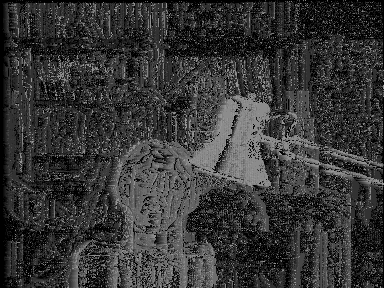

In [ ]:
disparity_range = 16
for y in range(height):
  for x in range(width):
    disparity = 0
    cost_min = 255
    #argmin() can be used
    for j in range(disparity_range):
      # Correctly index into the 'right' array
      cost = 255
      if (x-j) > 0:
        cost = abs(int(left[y, x]) - int(right[y, x-j]))
      if cost < cost_min:
        cost_min = cost
        disparity = j
    depth[y, x] = disparity

cv2_imshow(depth * scale)

In [ ]:
# costs = np.full((height, width, disparity_range), max_value, dtype=np.float32)
# for j in range(disparity_range):
#   left = left[:, j:width]
#   right = right[:, 0:width-j]
#   costs[:, j:width, j] = np.abs((left - right))

# min_cost_indices = np.argmin(costs, axis=2)
# depth = min_cost_indices * scale
# depth = depth.astype(np.uint8)
# cv2_imshow(depth)

ValueError: operands could not be broadcast together with shapes (288,381) (288,382) 

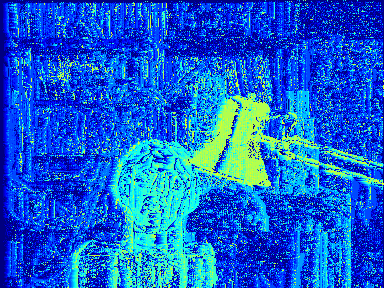

In [ ]:
color_depth = cv2.applyColorMap(depth*scale, cv2.COLORMAP_JET)
cv2_imshow(color_depth)

Method 2: Using kernel


In [ ]:
kernel_size = 5
kernel_half =   int((kernel_size - 1)/2)
scale = 10
max_value = 255 * 9


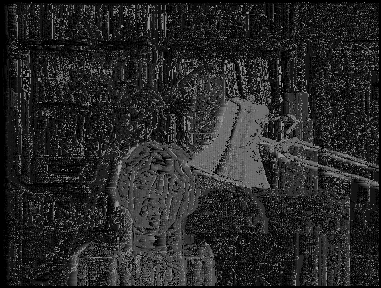

In [ ]:
for y in range(kernel_half, height-kernel_half):
  for x in range(kernel_half, width-kernel_half):
    disparity = 0
    cost_min = 65534
    for j in range(disparity_range):
      total = 0
      value = 0

      for v in range(-kernel_half, kernel_half+1):
        for u in range(-kernel_half, kernel_half+1):
          # Check if the index is within the bounds of 'right'
          # Adjusted the condition to ensure it stays within bounds
          value = max_value
          if (x + u - j) >= 0:
            value = l2_distance(int(left[y + v, x + u]),  int(right[y + v, (x + u) - j]))

          total += value

          if total < cost_min:
              cost_min = total
              disparity = j

    depth[y, x] = disparity


cv2_imshow(depth * scale)

Method 3:

In [ ]:
import numpy as np

def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)

    # Calculate cosine similarity
    similarity = dot_product / (norm_A * norm_B)

    return similarity


<ipython-input-43-c0464f2fe75b>:9: RuntimeWarning: invalid value encountered in scalar divide
  similarity = dot_product / (norm_A * norm_B)


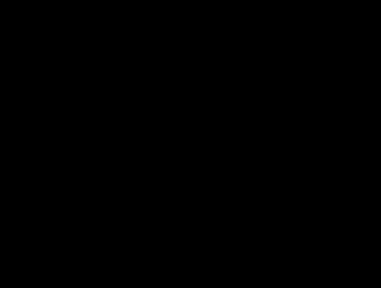

In [ ]:
for y in range(kernel_half, height-kernel_half):
  for x in range(kernel_half, width-kernel_half):
    disparity = 0
    cost_optional = -1
    for j in range(disparity_range):
      d = x-j
      cost = -1
      if d-kernel_half >= 0:
        wp = right[(y-kernel_half):(y - kernel_half)+1, (x-kernel_half):(x - kernel_half)+1].flatten()
        wqd = left[(y-kernel_half) : (y - kernel_half)+1, (x-kernel_half) : (x - kernel_half)+1].flatten()
        cost = cosine_similarity(wp, wqd)
      if cost > cost_optional:
        cost_optional = cost
        disparity = j
    depth[y, x] = disparity

cv2_imshow(depth * scale)
